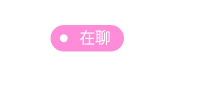

```java
import android.content.Context;
import android.content.res.Resources;
import android.graphics.Canvas;
import android.graphics.Color;
import android.graphics.Paint;
import android.graphics.RectF;
import android.util.AttributeSet;
import android.util.DisplayMetrics;
import android.util.TypedValue;
import android.view.View;

import androidx.annotation.Nullable;

/**
 * 直播状态
 */
public class LiveStatusView extends View {

    private int defaultWidth = 200;
    private int defaultHeight = 35;
    private Paint mPaint = new Paint(Paint.ANTI_ALIAS_FLAG);
    private int status = STATUS_LIVE;

    // 离线
    public static final int STATUS_DISCONNECT = 1;
    // 在线
    public static final int STATUS_ONLINE = 2;
    // 在聊
    public static final int STATUS_LIVE = 3;

    private float dotRadius = dp2px(3);

    public LiveStatusView(Context context, @Nullable AttributeSet attrs) {
        super(context, attrs);
        init();
    }

    public LiveStatusView(Context context, @Nullable AttributeSet attrs, int defStyleAttr) {
        super(context, attrs, defStyleAttr);
        init();
    }

    private void init() {

    }

    public void setStatus(int status) {
        this.status = status;
        invalidate();
    }

    @Override
    protected void onMeasure(int widthMeasureSpec, int heightMeasureSpec) {
        setMeasuredDimension(resolveSize(defaultWidth, widthMeasureSpec),
                resolveSize(defaultHeight, heightMeasureSpec));
    }


    private RectF rectF = new RectF();

    @Override
    protected void onDraw(Canvas canvas) {
        int bgColor = Color.WHITE;
        int textColor = Color.BLACK;
        String text = "";
        switch (status) {
            case STATUS_DISCONNECT:
                bgColor = Color.parseColor("#AB333333");
                textColor = Color.parseColor("#FFD4D4D4");
                text = "离线";
                break;
            case STATUS_ONLINE:
                bgColor = Color.parseColor("#AB2B2B2B");
                textColor = Color.parseColor("#3EFF76");
                text = "在线";
                break;
            case STATUS_LIVE:
                bgColor = Color.parseColor("#ABFE54C7");
                textColor = Color.parseColor("#FFFFFFFF");
                text = "在聊";
                break;
        }

        mPaint.setColor(bgColor);
        mPaint.setStyle(Paint.Style.FILL);
        rectF.set(0, 0, getWidth(), getHeight());
        canvas.drawRoundRect(rectF, getHeight() / 2f, getHeight() / 2f, mPaint);

        mPaint.setColor(textColor);
        mPaint.setStyle(Paint.Style.FILL);
        canvas.drawCircle(getHeight() / 2f, getHeight() / 2f, dotRadius, mPaint);
        mPaint.setStyle(Paint.Style.FILL_AND_STROKE);
        mPaint.setTextSize(dp2px(12));
        canvas.drawText(text, getHeight() + dp2px(2), getHeight() / 2f - (mPaint.ascent() + mPaint.descent()) / 2, mPaint);

    }

    public static float dp2px(float dp) {
        DisplayMetrics dm = Resources.getSystem().getDisplayMetrics();
        return TypedValue.applyDimension(TypedValue.COMPLEX_UNIT_DIP, dp, dm);
    }
}


```
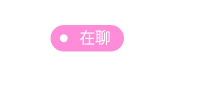